In [45]:
import pandas as pd
import numpy as np

df = pd.read_csv("enem_2022_v2.csv", low_memory=False, encoding="ISO-8859-1")

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 37 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  IN_TREINEIRO            int64  
 11  NO_MUNICIPIO_ESC        object 
 12  SG_UF_ESC               object 
 13  TP_DEPENDENCIA_ADM_ESC  float64
 14  TP_LOCALIZACAO_ESC      float64
 15  TP_PRESENCA_CN          int64  
 16  TP_PRESENCA_CH          int64  
 17  TP_PRESENCA_LC          int64  
 18  TP_PRESENCA_MT          int64  
 19  NU_NOTA_CN              float64
 20  NU_NOTA_CH              float64
 21  NU_NOTA_LC              float64

# Classificação de Cor/raça
    0	Não declarado
	1	Branca
	2	Preta
	3	Parda
	4	Amarela
	5	Indígena 
	6	Não dispõe da informação

In [48]:
#Alteração dos dados de acordo com as colunas
df['TP_COR_RACA'] = df['TP_COR_RACA'].apply(lambda x: '0. Não Declarado' if x == 0 else '1. Branca' if x == 1 else '2. Preta' if x == 2 else '3. Parda' if x == 3 else '4. Amarela' if x == 4 else '5. Indígena' if x == 5 else 'ND')

In [102]:
df_CR = df[['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].groupby('TP_COR_RACA').mean()

df_CR

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_COR_RACA,,,,,
0. Não Declarado,495.246021,523.777832,512.195471,534.888183,586.579295
1. Branca,512.950734,546.591271,537.748498,573.453383,660.535442
2. Preta,478.125922,510.187491,501.776239,508.381718,577.025050
3. Parda,482.919747,511.643486,501.319936,519.587162,588.188293
4. Amarela,497.508988,521.846437,511.376112,545.351315,608.978576
5. Indígena,461.968371,481.539102,467.026552,479.831974,519.884346


In [103]:
df_CR = df[['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].groupby('TP_COR_RACA').median()

df_CR

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_COR_RACA,,,,,
0. Não Declarado,483.0,525.00,518.9,518.0,600.0
1. Branca,505.4,551.30,546.9,571.1,680.0
2. Preta,469.3,513.80,509.4,493.9,600.0
3. Parda,472.9,513.60,507.8,504.4,600.0
4. Amarela,483.8,522.10,517.0,525.9,620.0
5. Indígena,452.5,483.95,469.2,461.3,560.0


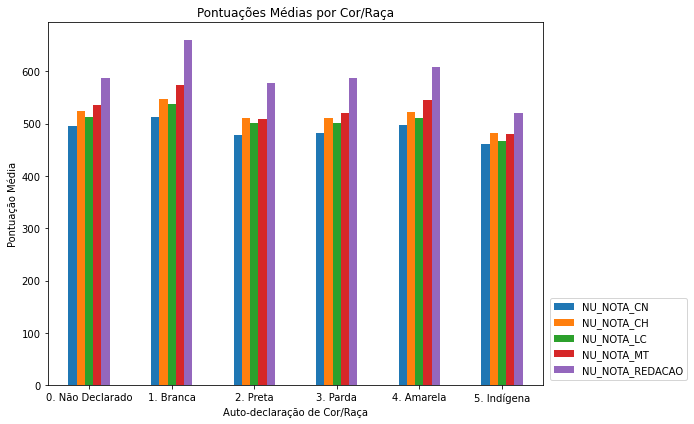

In [74]:
import matplotlib.pyplot as plt

ax = df_CR.plot.bar(rot=0, figsize=(10, 6))
ax.set_xlabel('Auto-declaração de Cor/Raça')
ax.set_ylabel('Pontuação Média')
ax.set_title('Pontuações Médias por Cor/Raça')

ax.legend(loc='lower right', bbox_to_anchor=(1.3, 0))

plt.tight_layout()
plt.show()

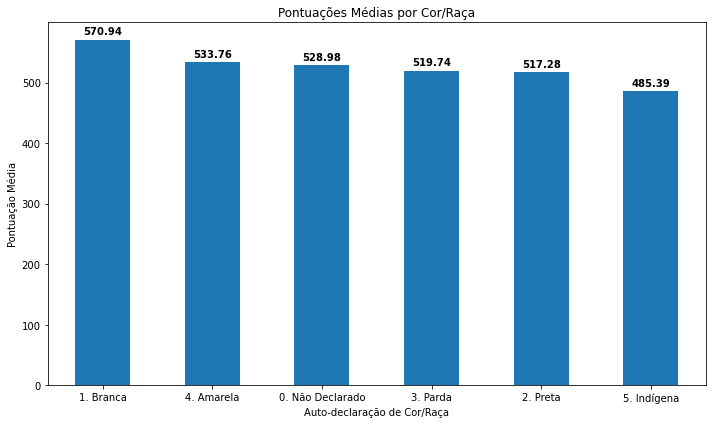

In [126]:
df_CR['MEDIA_NOTAS'] = df_CR[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

df_CR = df_CR.sort_values(by = 'MEDIA_NOTAS', ascending = False)

ax = df_CR['MEDIA_NOTAS'].plot.bar(rot=0, figsize=(10, 6))
ax.set_xlabel('Auto-declaração de Cor/Raça')
ax.set_ylabel('Pontuação Média')
ax.set_title('Pontuações Médias por Cor/Raça')

for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


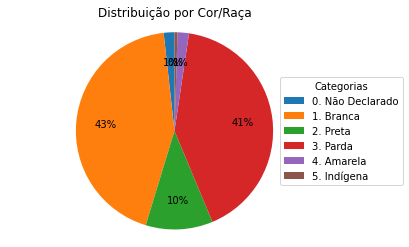

In [152]:
df_CR_count = df[['TP_COR_RACA', 'NU_NOTA_REDACAO']].groupby('TP_COR_RACA').count()

fig, ax = plt.subplots()
ax.pie(df_CR_count['NU_NOTA_REDACAO'], autopct='%d%%', startangle=90, pctdistance=0.7)
ax.axis('equal')

plt.title('Distribuição por Cor/Raça')

ax.legend(df_CR_count.index, title='Categorias', loc='center left', bbox_to_anchor=(0.8, 0.5))

plt.show()

In [161]:
df_CR_count.rename(columns={'NU_NOTA_REDACAO': 'PRESENTES_REDACAO'}, inplace=True)

df_CR_count['PERCENTUAL'] = (df_CR_count['PRESENTES_REDACAO'] / df_CR_count['PRESENTES_REDACAO'].sum()) * 100

df_CR_count

,PRESENTES_REDACAO,PERCENTUAL
TP_COR_RACA,,
0. Não Declarado,43874,1.759576
1. Branca,1085458,43.532514
2. Preta,274129,10.993999
3. Parda,1031072,41.351353
4. Amarela,46631,1.870146
5. Indígena,12278,0.492412


Distribuições semelhantes à autodeclaração geral no Brasil no IBGE:
https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html